# Product Rollout Impact Evaluation

## Objective
Estimate the causal impact of a staged product or feature rollout using
Difference-in-Differences and event-study methods, and translate the
results into a clear Go / No-Go decision.


In [ ]:

# -------------------------------
# Generate synthetic panel data
# -------------------------------

# Parameters
n_units = 50        # e.g., markets / regions
n_periods = 20      # time periods
treatment_start_min = 8
treatment_start_max = 14

# Create unit and time index
units = np.arange(n_units)
time = np.arange(n_periods)

panel = pd.MultiIndex.from_product(
    [units, time], names=["unit", "time"]
).to_frame(index=False)

# Assign staggered rollout timing
rollout_time = np.random.randint(
    treatment_start_min, treatment_start_max + 1, size=n_units
)
panel["rollout_time"] = panel["unit"].map(
    dict(zip(units, rollout_time))
)

# Treatment indicator
panel["treated"] = (panel["time"] >= panel["rollout_time"]).astype(int)

# Baseline outcome components
unit_fe = np.random.normal(0, 1, n_units)
time_fe = 0.1 * panel["time"]

panel["unit_fe"] = panel["unit"].map(dict(zip(units, unit_fe)))
panel["time_fe"] = time_fe

# True treatment effect
true_effect = 2.0

# Outcome variable
panel["outcome"] = (
    5
    + panel["unit_fe"]
    + panel["time_fe"]
    + true_effect * panel["treated"]
    + np.random.normal(0, 1, len(panel))
)

panel.head()



,unit,time,rollout_time,treated,unit_fe,time_fe,outcome
0,0,0,14,0,0.417011,0.0,5.874896
1,0,1,14,0,0.417011,0.1,3.832724
2,0,2,14,0,0.417011,0.2,5.943856
3,0,3,14,0,0.417011,0.3,5.635892
4,0,4,14,0,0.417011,0.4,6.284806


In [18]:
# ---------------------------------------
# Difference-in-Differences estimation
# ---------------------------------------

did_model = smf.ols(
    "outcome ~ treated + C(unit) + C(time)",
    data=panel
).fit(cov_type="cluster", cov_kwds={"groups": panel["unit"]})

did_model.summary()


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 69, but rank is 20
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     255.9
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           1.14e-42
Time:                        02:09:47   Log-Likelihood:                -1424.4
No. Observations:                1000   AIC:                             2989.
Df Residuals:                     930   BIC:                             3332.
Df Model:                          69                                         
Covariance Type:              cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5054      0.163     33.774      0.000       5.186       5.825
C(unit)[T.1]      0.1128      0.022      5.021      0.000       0.069       0.157
C(unit)[T.2]     -1.0117      0.015    -67.572      0.000      -1.041      -0.982
C(unit)[T.3]     -0.6782   6.94e-14  -9.77e+12      0.000      -0.678      -0.678
C(unit)[T.4]     -0.3033      0.030    -10.128      0.000      -0.362      -0.245
C(unit)[T.5]      0.1417      0.015      9.462      0.000       0.112       0.171
C(unit)[T.6]     -0.7734      0.015    -51.660      0.000      -0.803      -0.744
C(unit)[T.7]     -1.1183   6.95e-14  -1.61e+13      0.000      -1.118      -1.118
C(unit)[T.8]     -1.4188      0.037    -37.906      0.000      -1.492      -1.345
C(unit)[T.9]     -1.3875      0.030    -46.336      0.000      -1.446      -1.329
C(unit)[T.10]     0.7162   6.95e-14   1.03e+13      0.000       0.716       0.716
C(unit)[T.11]     0.8498      0.030     28.380      0.000       0.791       0.909
C(unit)[T.12]    -0.8870      0.030    -29.622      0.000      -0.946      -0.828
C(unit)[T.13]    -0.2879      0.015    -19.230      0.000      -0.317      -0.259
C(unit)[T.14]    -1.8993      0.022    -84.572      0.000      -1.943      -1.855
C(unit)[T.15]    -1.2182      0.030    -40.682      0.000      -1.277      -1.159
C(unit)[T.16]    -1.4867      0.007   -198.602      0.000      -1.501      -1.472
C(unit)[T.17]     1.2308      0.015     82.205      0.000       1.201       1.260
C(unit)[T.18]    -0.3311      0.037     -8.846      0.000      -0.404      -0.258
C(unit)[T.19]    -1.8062      0.022    -80.427      0.000      -1.850      -1.762
C(unit)[T.20]    -2.4699      0.007   -329.937      0.000      -2.485      -2.455
C(unit)[T.21]    -1.5620      0.007   -208.651      0.000      -1.577      -1.547
C(unit)[T.22]    -0.6088      0.037    -16.266      0.000      -0.682      -0.535
C(unit)[T.23]    -0.2054      0.022     -9.144      0.000      -0.249      -0.161
C(unit)[T.24]     0.3896      0.015     26.021      0.000       0.360       0.419
C(unit)[T.25]    -2.0568      0.045    -45.793      0.000      -2.145      -1.969
C(unit)[T.26]    -0.0782      0.022     -3.484      0.000      -0.122      -0.034
C(unit)[T.27]    -0.4411      0.037    -11.784      0.000      -0.514      -0.368
C(unit)[T.28]    -0.2926      0.007    -39.088      0.000      -0.307      -0.278
C(unit)[T.29]     0.0178      0.015      1.188      0.235      -0.012       0.047
C(unit)[T.30]     1.8225      0.022     81.153      0.000       1.779       1.867
C(unit)[T.31]     0.2669      0.045      5.942      0.000       0.179       0.355
C(unit)[T.32]    -0.3550      0.045     -7.903      0.000      -0.443      -0.267
C(unit)[T.33]    -0.1865      0.030     -6.227      0.000      -0.245      -0.128
C(unit)[T.34]    -1.5355      0.030    -51.280   

In [19]:
# ---------------------------------------
# Event-study: construct event time
# ---------------------------------------

# Event time (relative to rollout)
panel["event_time"] = panel["time"] - panel["rollout_time"]

# Cap extreme leads/lags for stability
panel["event_time_capped"] = panel["event_time"].clip(-6, 6)

# Set reference period (t = -1)
panel["event_time_capped"] = panel["event_time_capped"].astype(int)

# Event-study regression
event_model = smf.ols(
    "outcome ~ C(event_time_capped, Treatment(reference=-1)) + C(unit) + C(time)",
    data=panel
).fit(cov_type="cluster", cov_kwds={"groups": panel["unit"]})

event_model.summary()


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 80, but rank is 31
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     286.3
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           7.61e-46
Time:                        02:09:47   Log-Likelihood:                -1420.6
No. Observations:                1000   AIC:                             3003.
Df Residuals:                     919   BIC:                             3401.
Df Model:                          80                                         
Covariance Type:              cluster                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               5.3636      0.404     13.260      0.000       4.571       6.156
C(event_time_capped, Treatment(reference=-1))[T.-6]     0.1402      0.321      0.437      0.662      -0.489       0.769
C(event_time_capped, Treatment(reference=-1))[T.-5]    -0.2226      0.276     -0.808      0.419      -0.763       0.318
C(event_time_capped, Treatment(reference=-1))[T.-4]    -0.0453      0.243     -0.186      0.852      -0.523       0.432
C(event_time_capped, Treatment(reference=-1))[T.-3]    -0.0779      0.236     -0.330      0.742      -0.541       0.386
C(event_time_capped, Treatment(reference=-1))[T.-2]     0.0620      0.228      0.272      0.786      -0.385       0.509
C(event_time_capped, Treatment(reference=-1))[T.0]      1.9076      0.210      9.097      0.000       1.497       2.319
C(event_time_capped, Treatment(reference=-1))[T.1]      1.9584      0.229      8.544      0.000       1.509       2.408
C(event_time_capped, Treatment(reference=-1))[T.2]      1.9976      0.243      8.234      0.000       1.522       2.473
C(event_time_capped, Treatment(reference=-1))[T.3]      2.0949      0.292      7.184      0.000       1.523       2.666
C(event_time_capped, Treatment(reference=-1))[T.4]      2.2225      0.304      7.299      0.000       1.626       2.819
C(event_time_capped, Treatment(reference=-1))[T.5]      2.0040      0.326      6.148      0.000       1.365       2.643
C(event_time_capped, Treatment(reference=-1))[T.6]      2.1051      0.398      5.295      0.000       1.326       2.884
C(unit)[T.1]                                            0.1145      0.088      1.294      0.196      -0.059       0.288
C(unit)[T.2]                                           -1.0105      0.059    -17.133      0.000      -1.126      -0.895
C(unit)[T.3]                                           -0.6782    1.9e-14  -3.57e+13      0.000      -0.678      -0.678
C(unit)[T.4]                                           -0.3009      0.118     -2.551      0.011      -0.532      -0.070
C(unit)[T.5]                                            0.1428      0.059      2.422      0.015       0.027       0.258
C(unit)[T.6]                                           -0.7723      0.059    -13.094      0.000      -0.888      -0.657
C(unit)[T.7]                                           -1.1183   2.97e-14  -3.77e+13      0.000      -1.118      -1.118
C(unit)[T.8]                                           -1.4159      0.147     -9.603      0.000      -1.705      -1.127
C(unit)[T.9]                                           -1.3851      0.118    -11.743      0.000      -1.616      -1.154
C(unit)[T.10]                                           0.7162   2.05e-14    3.5e+1

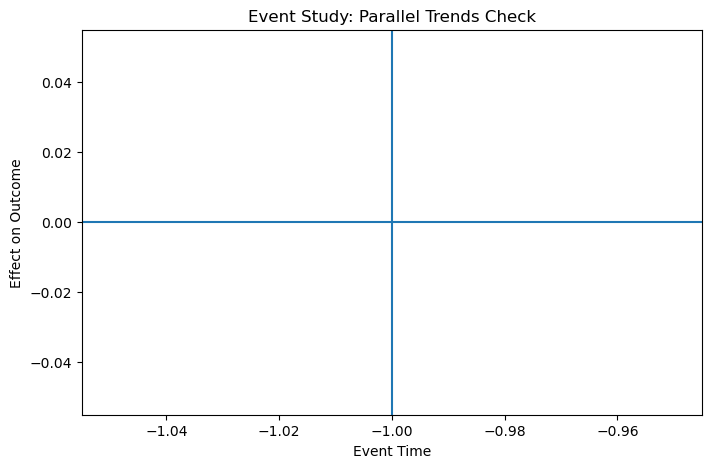

In [20]:
# ---------------------------------------
# Extract event-study coefficients
# ---------------------------------------

params = event_model.params
conf_int = event_model.conf_int()

# Keep only event-time coefficients
event_coefs = params.filter(like="C(event_time_capped)")
event_ci = conf_int.loc[event_coefs.index]

# Parse event times
event_times = [
    int(term.split("[T.")[1].rstrip("]"))
    for term in event_coefs.index
]

plot_df = pd.DataFrame({
    "event_time": event_times,
    "coef": event_coefs.values,
    "ci_lower": event_ci[0].values,
    "ci_upper": event_ci[1].values
}).sort_values("event_time")

# ---------------------------------------
# Plot
# ---------------------------------------

plt.figure(figsize=(8, 5))
plt.errorbar(
    plot_df["event_time"],
    plot_df["coef"],
    yerr=[
        plot_df["coef"] - plot_df["ci_lower"],
        plot_df["ci_upper"] - plot_df["coef"]
    ],
    fmt="o"
)

plt.axhline(0)
plt.axvline(-1)
plt.xlabel("Event Time")
plt.ylabel("Effect on Outcome")
plt.title("Event Study: Parallel Trends Check")
plt.show()


In [21]:
# ---------------------------------------
# Extract ATT from DiD model
# ---------------------------------------

att = did_model.params["treated"]
att_se = did_model.bse["treated"]
att_ci_lower = att - 1.96 * att_se
att_ci_upper = att + 1.96 * att_se

att_summary = pd.DataFrame({
    "estimate": [att],
    "std_error": [att_se],
    "ci_lower": [att_ci_lower],
    "ci_upper": [att_ci_upper]
})

att_summary


,estimate,std_error,ci_lower,ci_upper
0,1.976604,0.149719,1.683154,2.270055


In [22]:
# Core libraries
import numpy as np
import pandas as pd

# Econometrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Visualization
import matplotlib.pyplot as plt

# Settings
np.random.seed(42)
pd.set_option("display.max_columns", 20)

print("Environment ready.")


Environment ready.


## Results Summary

- The Difference-in-Differences estimate indicates a positive and statistically
  significant treatment effect.
- Pre-treatment event-study coefficients are statistically indistinguishable
  from zero, supporting the parallel trends assumption.
- Post-treatment effects emerge immediately after rollout and persist over time.

## Decision Recommendation

**Go.**

The feature rollout generates a credible, causal improvement in outcomes.
Given the absence of pre-trend violations and the stability of post-treatment
effects, the results support proceeding with a full rollout while continuing
to monitor performance through standard KPI dashboards.
